# Solution lab matplotlib-seaborn

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Challenge 1

#### Data

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x,y) and (x,z) on the axes.
There are 2 ways of doing this. Do in both ways.
Hint: Check out the nrows, ncols, and index arguments of subplots

Also, play around with the linewidth and style. Use the ones you're most happy with.

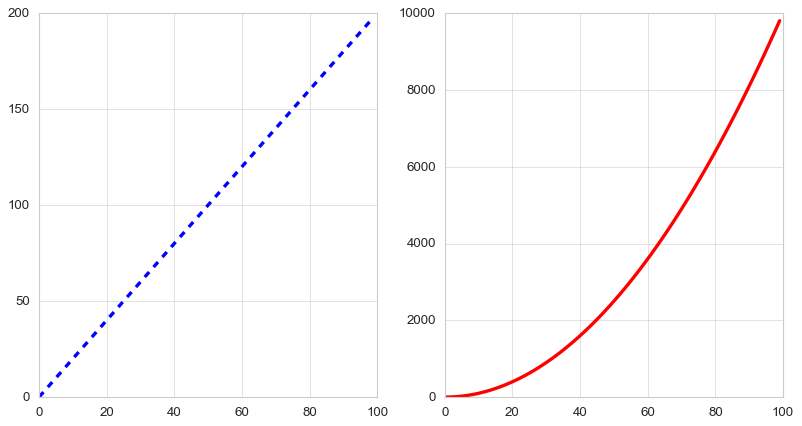

In [39]:
# your code here-1st way
plt.subplot(1,2,1)
plt.plot(x,y,lw=3,color="b", ls='--')
plt.subplot(1,2,2)
plt.plot(x,z,lw=3, color="r",ls='-')

#### Use plt.subplots(nrows=1, ncols=2) to create the plot below

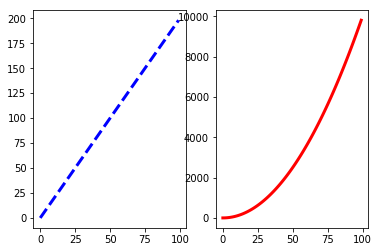

In [4]:
# your code here-2st way
fig,axes=plt.subplots(1,2)
axes[0].plot(x,y,color="b", lw=3, ls='--')
axes[1].plot(x,z,color="r", lw=3, ls='-')

#### Augmenting your previous code, resize your previous plot.
Hint: Add the figsize argument in plt.subplots()

Text(0, 0.5, 'z')

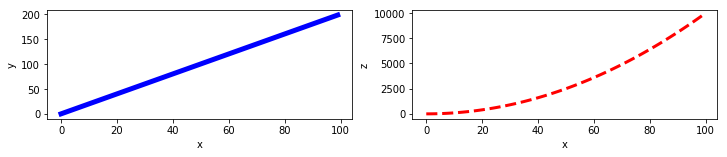

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12,2))

axes[0].plot(x,y,color="blue", lw=5)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

axes[1].plot(x,z,color="red", lw=3, ls='--')
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')

#### Plot both y=x^2 and y=exp(x) in the same plot using normal and logarithmic scale.
Hint: Use set_xscale and set_yscale

Text(0.5, 1.0, 'Logarithmic scale (y)')

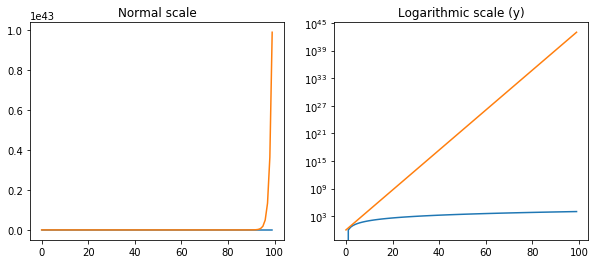

In [6]:
#your code here
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2,x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2,x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)")

# Challenge 2

#### Import the Fitbit2.csv file and name your dataset fitbit

In [9]:
fitbit=pd.read_csv('C:/Users/Claire/Documents/GitHub/data-labs/module-2/lab-matplotlib-seaborn/your-code/Fitbit2.csv')
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?
Is Fitbitter more active on weekend or workdays?
All plots must be in the same jupyter notebook cell.
Hints:

Use Months_encoded and Week_or Weekend columns
Use matplolib.pyplot object oriented API
Set your size figure to 12,4
Explore plt.sca
Explore plt.xticks
Save your figures

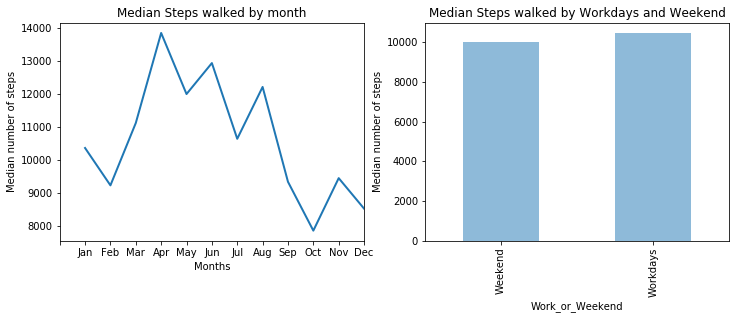

In [10]:
# Median Steps by Month_encoded
weekday_steps = fitbit['Steps'].groupby(fitbit['Months_encoded']).median()
weekday_steps.head(5)

fig,axes = plt.subplots(figsize = (12,4),nrows = 1, ncols = 2)
plt.sca(axes[0])
weekday_steps.plot(kind = 'line',linewidth=2)
plt.ylabel('Median number of steps')
plt.xlabel('Months')
plt.title('Median Steps walked by month')
plt.xticks(list(range(13)),['','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

plt.savefig('steps_months.png',bbox_inches='tight')


# Median Steps by Work_or_Weekend
plt.sca(axes[1])
weekday_steps = fitbit['Steps'].groupby(fitbit['Work_or_Weekend']).median().sort_values()
weekday_steps.plot(kind = 'bar',alpha = 0.5)
plt.ylabel('Median number of steps')
plt.title('Median Steps walked by Workdays and Weekend')
plt.xticks(list(range(2)),['Weekend','Workdays'])

plt.savefig('steps_work_weekend.png',bbox_inches='tight')

#### Write a loop to plot 3 scatter plots of the following features:

Minutes Lightly Active vs Steps
Minutes Very Active vs Steps
Minutes Sedentary vs Steps

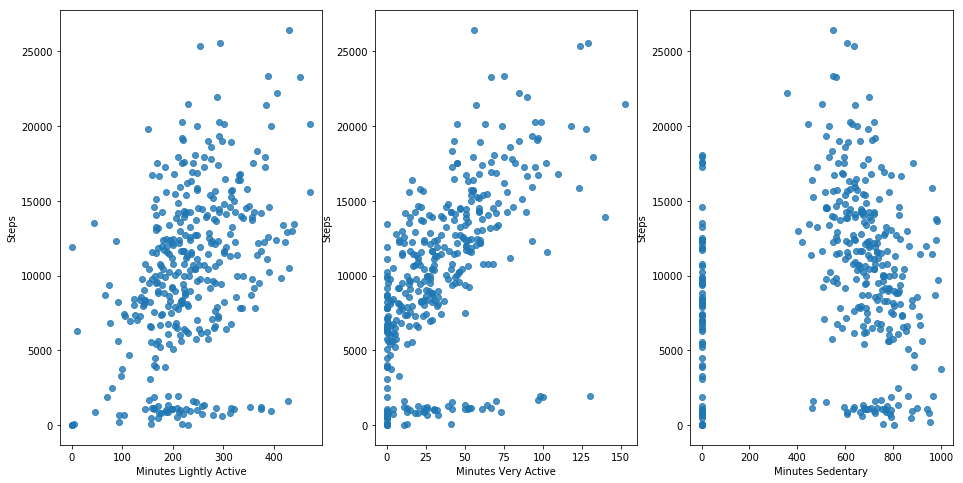

In [11]:
cols=['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary','Steps']
df=fitbit[cols]
fig,axes = plt.subplots(figsize = (16,8), nrows = 1, ncols = 3)
for i in range(3):
    plt.sca(axes[i])
    plt.scatter(df.iloc[:,i],df['Steps'], alpha = 0.8)
    plt.xlabel(df.iloc[:,i].name)
    plt.ylabel('Steps')

# Challenge 3

#### Open the titanic file. Name your dataset titanic

In [14]:
# your code here
import pandas as pd
titanic = pd.read_csv('C:/Users/Claire/Documents/GitHub/data-labs/module-2/lab-matplotlib-seaborn/your-code/titanic.csv',low_memory=False)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [15]:
#your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
Hint: Use Pandas select_dtypes

In [16]:
# your code here- numerical variable
titanic.select_dtypes(exclude=object).head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250


In [17]:
#your code here- categorical variable
titanic.select_dtypes(exclude=['int','float']).head(3)

,PassengerId,Pclass,Name,Gender,SibSp,Parch,Ticket,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,U0,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,U0,S


#### Set the plot style to classic and the figure size to (12,6)
Hint: To set the style you can use matplotlib.pyplot functions or seaborn 

In [18]:
# your code here
plt.style.use('classic')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the right visulalization to show the distribution of the column Age

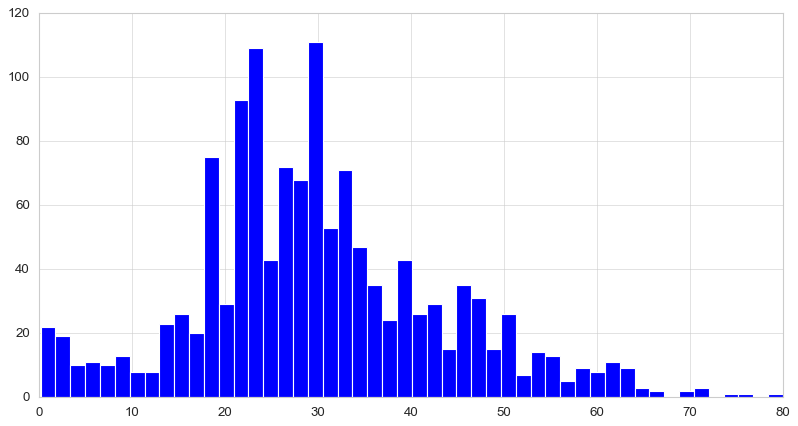

In [19]:
# your code here
titanic['Age'].hist(bins=50)

#### Use subplots and plot the distribution of the Age variable with bins equal to 10,20 and 50.

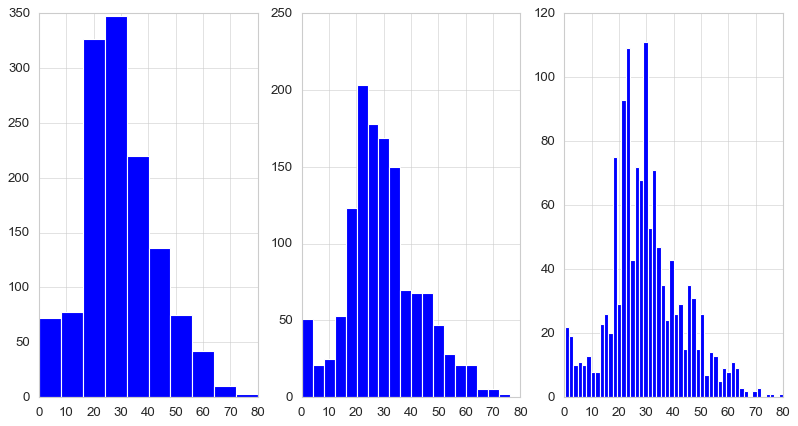

In [20]:
# your code here
plt.subplot(1,3,1)
titanic['Age'].hist()
plt.subplot(1,3,2)
titanic['Age'].hist(bins=20)
plt.subplot(1,3,3)
titanic['Age'].hist(bins=50)

#### How does the bin size affect your plot? Comment.

In [ ]:
#your comment here

#### Use seaborn to show the distribution of the column Age

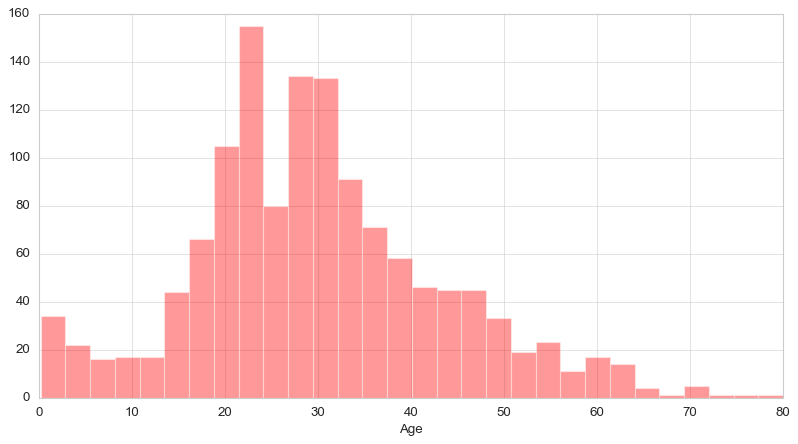

In [21]:
# your code here
sns.distplot(titanic['Age'],bins=30,kde=False,color='red')

#### Use the right plot to visualize the column Gender. There are 2 ways of doing it. Do it both ways.
Hint: Use matplotlib and seaborn

Text(0, 0.5, 'Count')

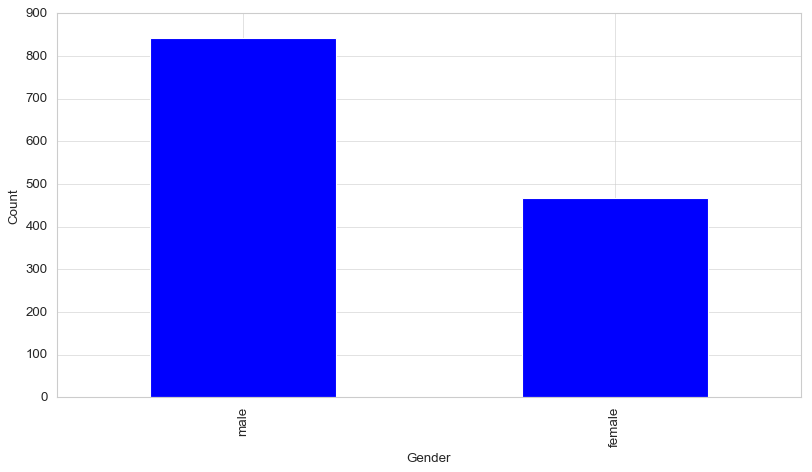

In [22]:
# your code here- 1st way
titanic['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')

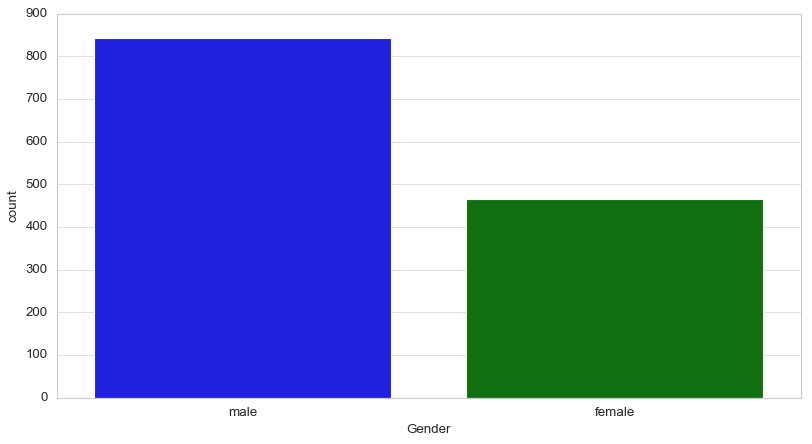

In [23]:
# your code here- 2nd way
sns.countplot(x='Gender',data=titanic)

#### Use the right plot to visualize the column Pclass

Text(0, 0.5, 'Count')

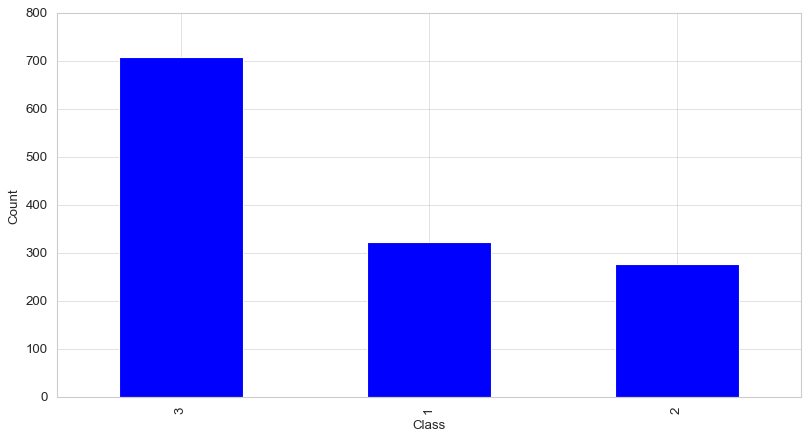

In [24]:
# your code here
titanic['Pclass'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')

#### We would like to have in one single plot the summary statistics of the feature Age. What kind of plot would you use?

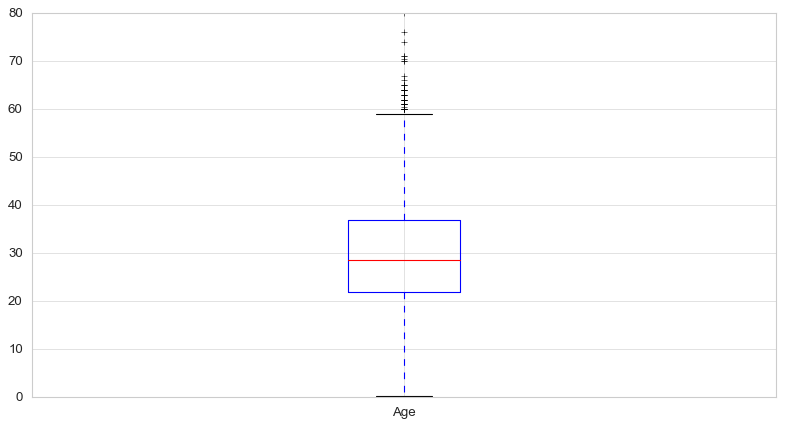

In [25]:
titanic.boxplot(column='Age')

#### What does the last plot tells you about the feature Age? Comment.

In [26]:
# your comment here

#### Now in addition to the summary statistics, we want to have in the SAME plot the distribution of Age. What kind of plot would you use?

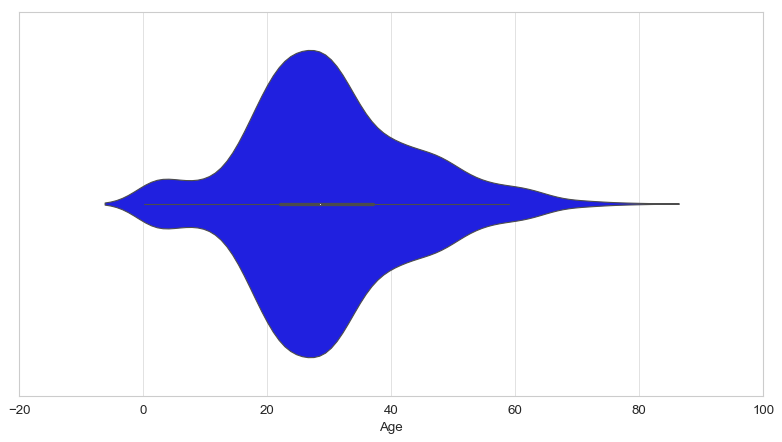

In [27]:
#your code here
sns.violinplot("Age", data=titanic)

#### What additional information the last plot provides you about the feature Age? Comment.

In [ ]:
#your comment here

#### We suspect that there is a linear relationship between Fare and Age. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
Hint: One of the ways involves using Seaborn

In [ ]:
#your code- 1st way

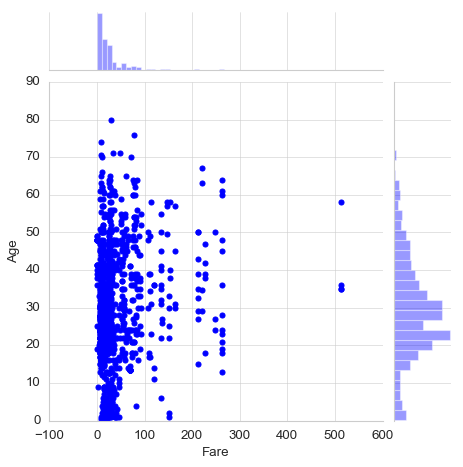

In [28]:
# your code-2nd way
sns.jointplot(x='Fare',y='Age',data=titanic)

#### Using Seaborn plot the correlation matrix 

Text(0.5, 1.0, 'Correlation matrix')

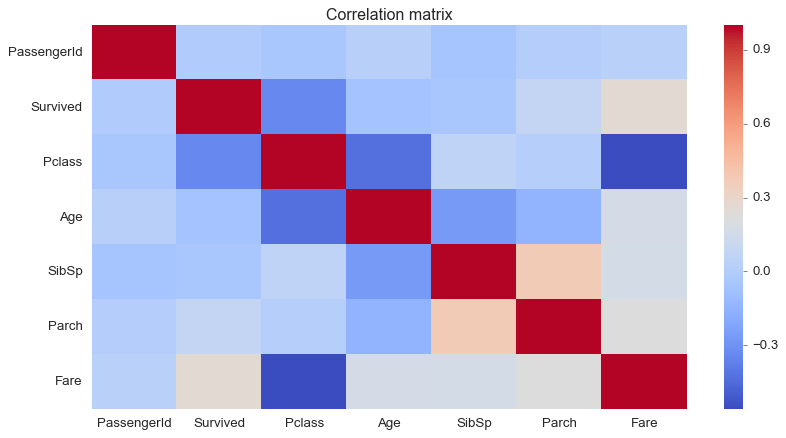

In [29]:
#your code here
sns.heatmap(titanic.corr(),cmap='coolwarm')
plt.title('Correlation matrix')

#### What are the most correlated feature? Comment

In [ ]:
#your comment here

#### Use the right plot to display the summary statistics of the Age in function of the Pclass

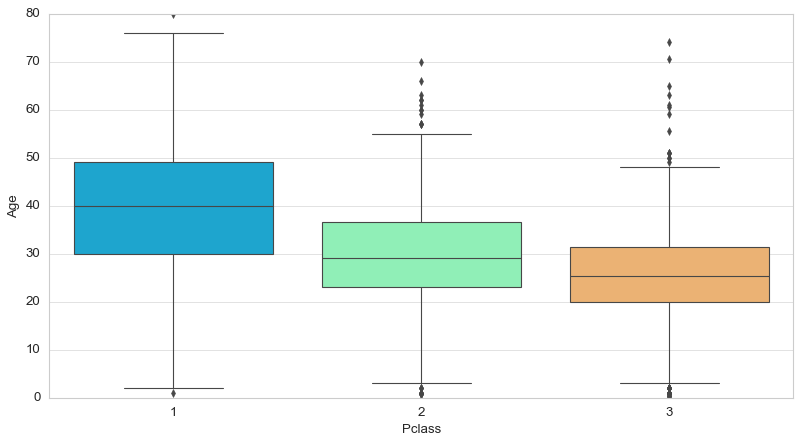

In [30]:
#your code here
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='rainbow')

#### Use the seaborn to plot the distribution of the Age based on the Gender
Hint: Use Facetgrid

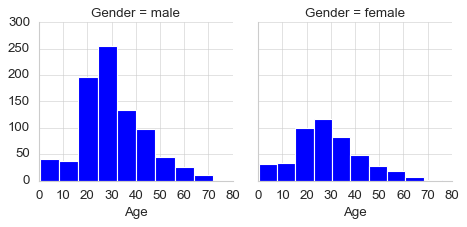

In [31]:
#your code here
g = sns.FacetGrid(data=titanic,col='Gender')
g.map(plt.hist,'Age')